**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Marcos Eduardo García Ortiz
*   MATRÍCULA: A01276213


*   NOMBRE: Renzo Antonio Zagni Vestrini
*   MATRÍCULA: A01795457


*   NOMBRE: Jorge Barón
*   MATRÍCULA: A01422588


*   NOMBRE: Dalia Isabel López Tapia
*   MATRÍCULA: A01245026

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Maestria/Primer Trimstre/Ciencia de datos/Actividades/Actividad 6"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [ ]:
cars_df.drop(["id", "VIN", "url", "image_url", "description", "posting_date"], axis=1, inplace=True)

In [ ]:
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy,33.786500,-84.445400


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [ ]:
num_register = len(cars_df)
num_columns = cars_df.shape[1]
print(f'Numero de registros: {num_register}')
print(f'Numero de columnas: {num_columns}')

Numero de registros: 426880
Numero de columnas: 20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [ ]:
# Def function for procentage

def get_missing_porcentage(cars_df):
  porcentage_list = cars_df.isnull().sum()/len(cars_df)*100

  for columna, valor in porcentage_list.items():
      print(f"{columna}: {valor:.3f} %")

get_missing_porcentage(cars_df)

region: 0.000 %
region_url: 0.000 %
price: 0.000 %
year: 0.282 %
manufacturer: 4.134 %
model: 1.236 %
condition: 40.785 %
cylinders: 41.622 %
fuel: 0.706 %
odometer: 1.031 %
title_status: 1.931 %
transmission: 0.599 %
drive: 30.586 %
size: 71.767 %
type: 21.753 %
paint_color: 30.501 %
county: 100.000 %
state: 0.000 %
lat: 1.534 %
long: 1.534 %


In [ ]:
cars_df.dropna(thresh=0.7*len(cars_df), axis=1, inplace=True)

In [ ]:
cars_df.columns

Index(['region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'type', 'state',
       'lat', 'long'],
      dtype='object')

In [ ]:
porcentage_list = cars_df.isnull().sum()/len(cars_df)*100

get_missing_porcentage(cars_df)

delete_columns = num_columns - cars_df.shape[1]
print(f'Numero de columnas eliminadas: {delete_columns}')

region: 0.000 %
region_url: 0.000 %
price: 0.000 %
year: 0.282 %
manufacturer: 4.134 %
model: 1.236 %
fuel: 0.706 %
odometer: 1.031 %
title_status: 1.931 %
transmission: 0.599 %
type: 21.753 %
state: 0.000 %
lat: 1.534 %
long: 1.534 %
Numero de columnas eliminadas: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [ ]:
porcentage_list = cars_df.isnull().sum()/len(cars_df)*100
drop_columns = []
for columna, valor in porcentage_list.items():
  if valor < 5:
    drop_columns.append(columna)
print(f'Columnas a eliminar: {drop_columns}')

Columnas a eliminar: ['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state', 'lat', 'long']


In [ ]:
cars_df.dropna(subset=drop_columns, inplace=True)

In [ ]:
porcentage_eliminado = 100 - (len(cars_df)/num_register)*100
print(f"Porcentage eliminado: {porcentage_eliminado:.4f} %")

Porcentage eliminado: 10.1647 %


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
# Calcular porcentage de valores
get_missing_porcentage(cars_df)

region: 0.000 %
region_url: 0.000 %
price: 0.000 %
year: 0.000 %
manufacturer: 0.000 %
model: 0.000 %
fuel: 0.000 %
odometer: 0.000 %
title_status: 0.000 %
transmission: 0.000 %
type: 21.486 %
state: 0.000 %
lat: 0.000 %
long: 0.000 %


In [ ]:
# Type al ser una variable categorica el metodo de imputacion sera la moda
cars_df['type'].fillna(value = cars_df['type'].mode()[0], inplace=True)
get_missing_porcentage(cars_df)

region: 0.000 %
region_url: 0.000 %
price: 0.000 %
year: 0.000 %
manufacturer: 0.000 %
model: 0.000 %
fuel: 0.000 %
odometer: 0.000 %
title_status: 0.000 %
transmission: 0.000 %
type: 0.000 %
state: 0.000 %
lat: 0.000 %
long: 0.000 %


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

<Axes: xlabel='price', ylabel='Count'>

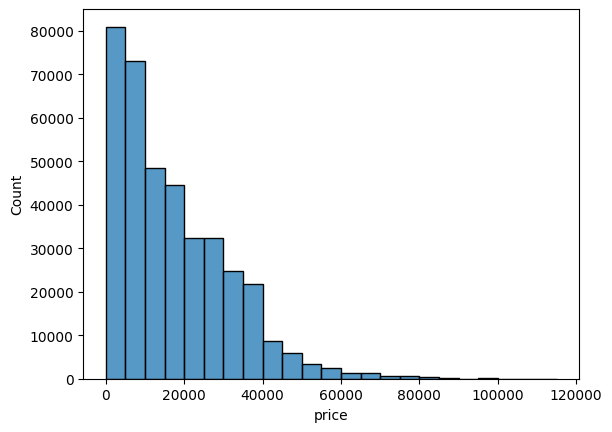

In [ ]:
rango_bins = range(0,120000, 5000)

sns.histplot(data=cars_df , x='price', bins=rango_bins)

<Axes: >

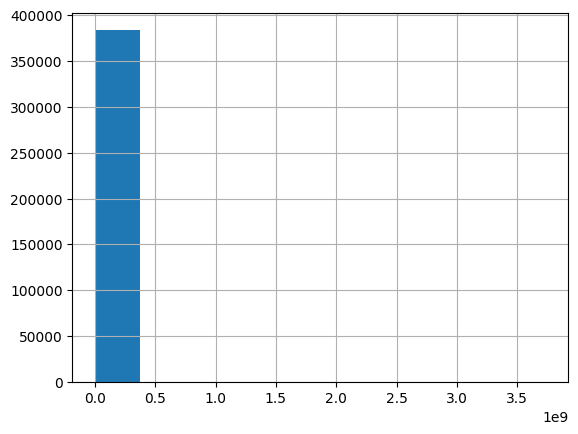

In [ ]:
cars_df['price'].hist()

<Axes: xlabel='year', ylabel='Count'>

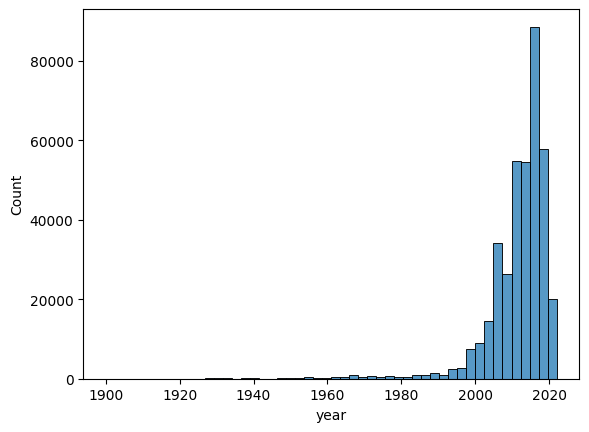

In [ ]:
sns.histplot(data=cars_df , x='year', bins=50)

<Axes: xlabel='odometer', ylabel='Count'>

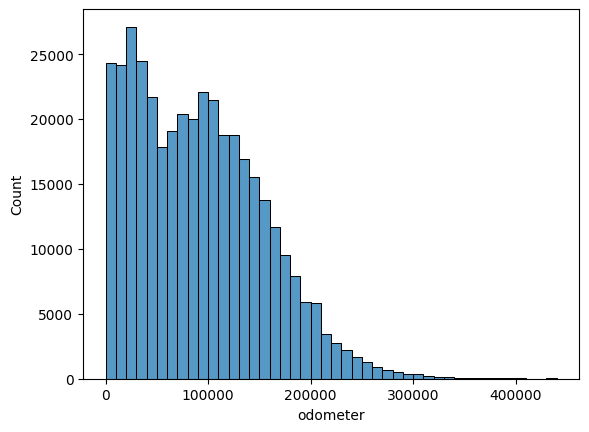

In [ ]:
rango_bins = range(0,450000, 10000)
sns.histplot(data=cars_df , x='odometer', bins=rango_bins)

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [ ]:
cars_df['age'] = 2023 - cars_df['year']
cars_df.drop(['year'], axis="columns", inplace=True)
cars_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000,9.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000,13.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000,3.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000,6.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400,4.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400,3.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811,3.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400,5.0


<Axes: xlabel='age', ylabel='Count'>

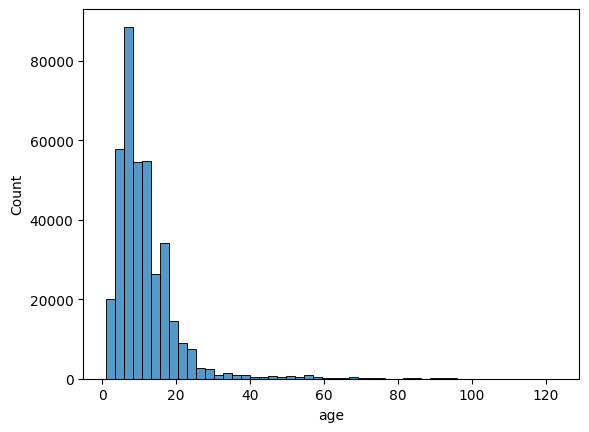

In [ ]:
sns.histplot(data=cars_df , x='age', bins = 50)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

<Axes: xlabel='price'>

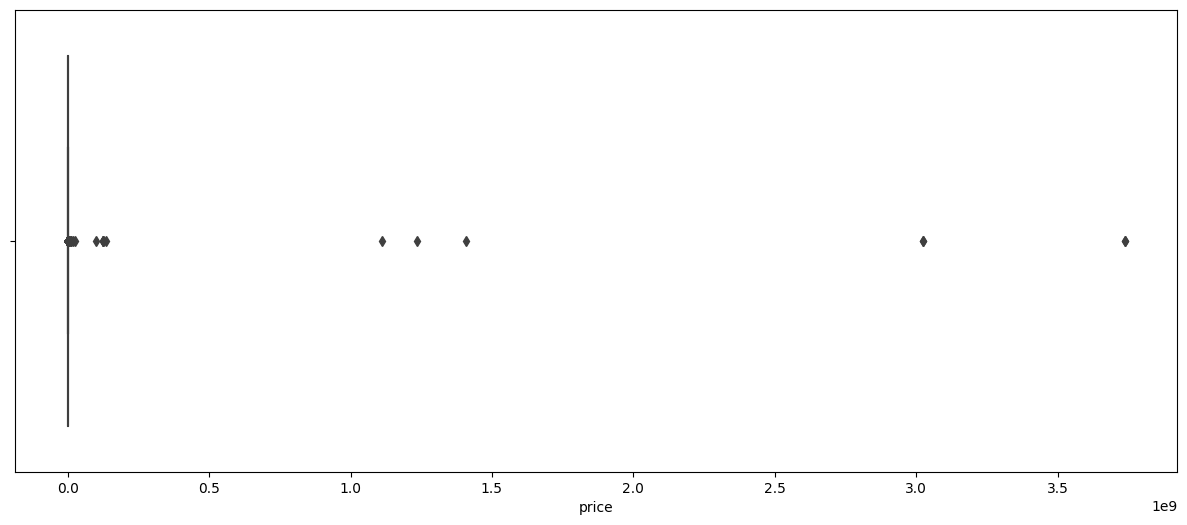

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cars_df, x='price')

<Axes: xlabel='age'>

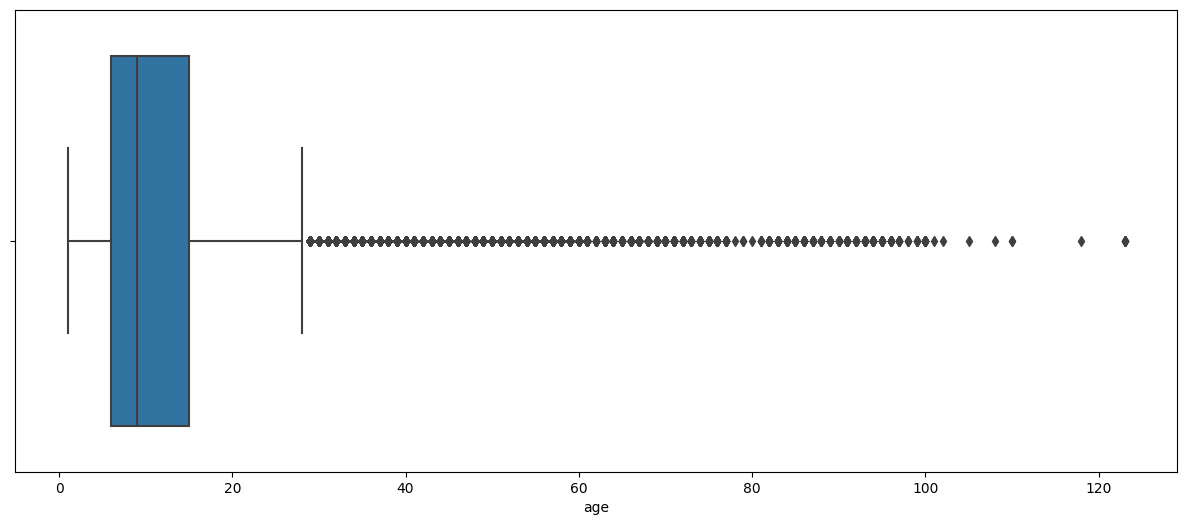

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cars_df, x='age')

<Axes: xlabel='odometer'>

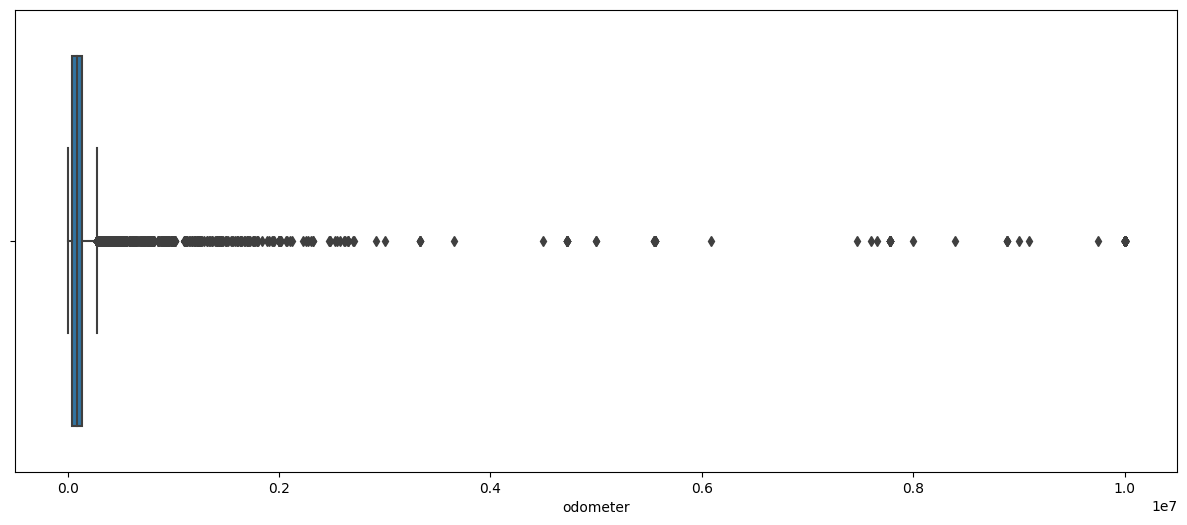

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cars_df, x='odometer')

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [ ]:
# Valores atipicos análisis

def analize_outliers(df, columna, delete=False):
  percentile_25 = df[columna].quantile(0.25)
  percentile_75 = df[columna].quantile(0.75)
  iqr = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * iqr
  lower_limit = percentile_25 - 1.5 * iqr

  outliers = df[(df[columna] < lower_limit) | (df[columna] > upper_limit)]

  missing_porcentage = len(outliers)/len(df)*100

  print(f" Numero de valores faltantes en {columna} : {len(outliers)}")
  print(f" Porcentaje faltantes en {columna} : {missing_porcentage:.3f} %")

  if delete == True:
    df.drop(outliers.index, inplace=True)

analize_outliers(cars_df, "price", True)

 Numero de valores faltantes en price : 6285
 Porcentaje faltantes en price : 1.639 %


In [ ]:
analize_outliers(cars_df, 'odometer', True)

 Numero de valores faltantes en odometer : 3084
 Porcentaje faltantes en odometer : 0.818 %


In [ ]:
analize_outliers(cars_df, 'age', True)

 Numero de valores faltantes en age : 11343
 Porcentaje faltantes en age : 3.032 %


In [ ]:
porcentage_eliminado = 100 - (len(cars_df)/num_register)*100
print(f"Porcentage eliminado: {porcentage_eliminado:.4f} %")
print(f'Valores eliminados: {num_register - len(cars_df)}')

Porcentage eliminado: 15.0166 %
Valores eliminados: 64103


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

<Axes: xlabel='price', ylabel='Count'>

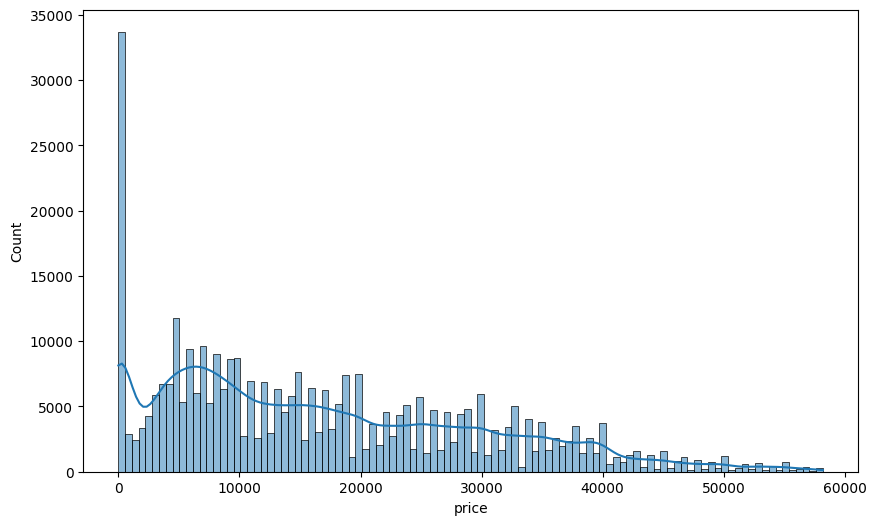

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cars_df , x='price', kde=True)

<Axes: xlabel='odometer', ylabel='Count'>

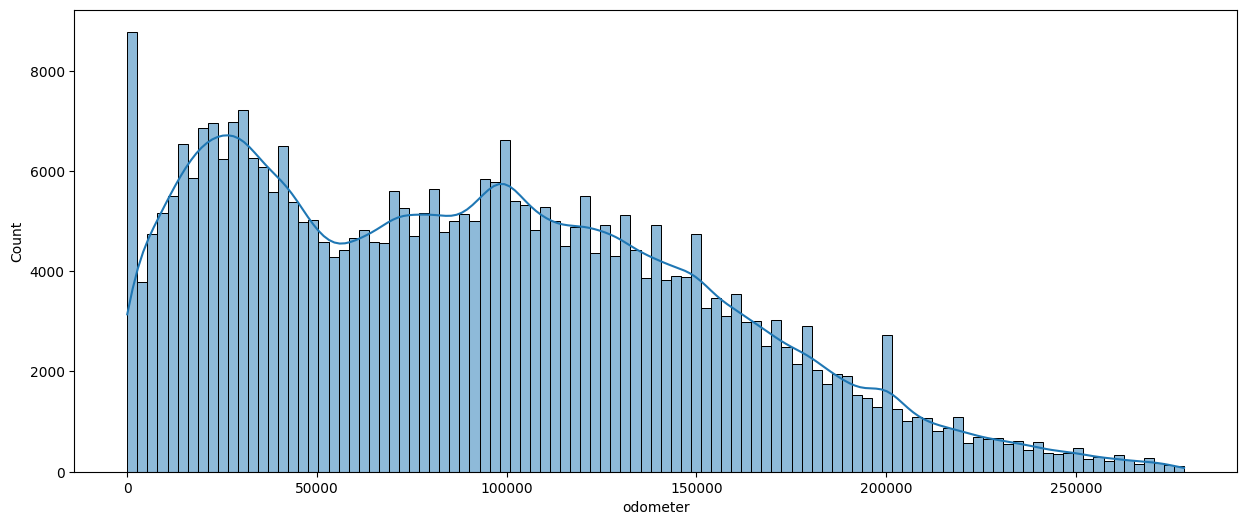

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=cars_df , x='odometer', kde=True)

<Axes: xlabel='age', ylabel='Count'>

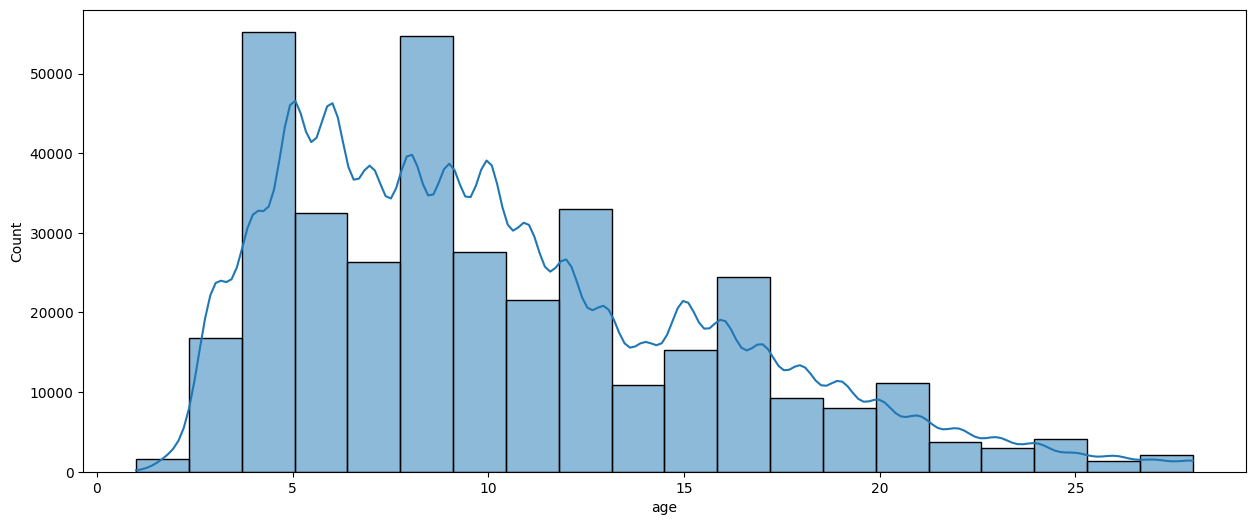

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=cars_df , x='age', kde=True, bins =20)

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [ ]:
def diagnostic_plots(df, variable):

  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.title(f"Histogram of {variable}")
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.title(f"Q-Q plot of {variable}")
  plt.show()

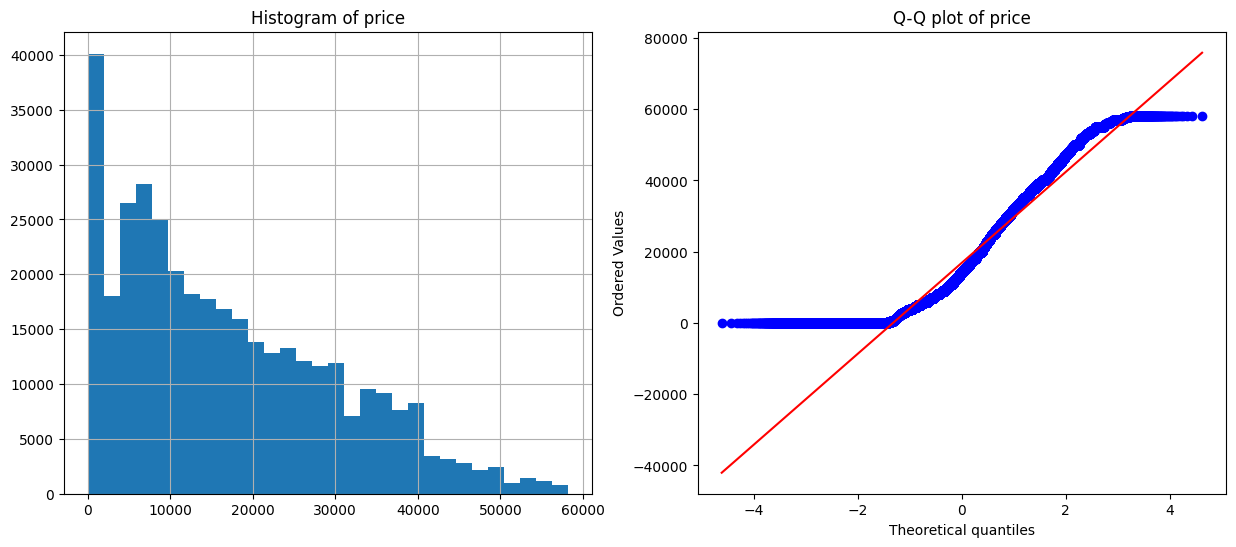

In [ ]:
diagnostic_plots(cars_df, 'price')

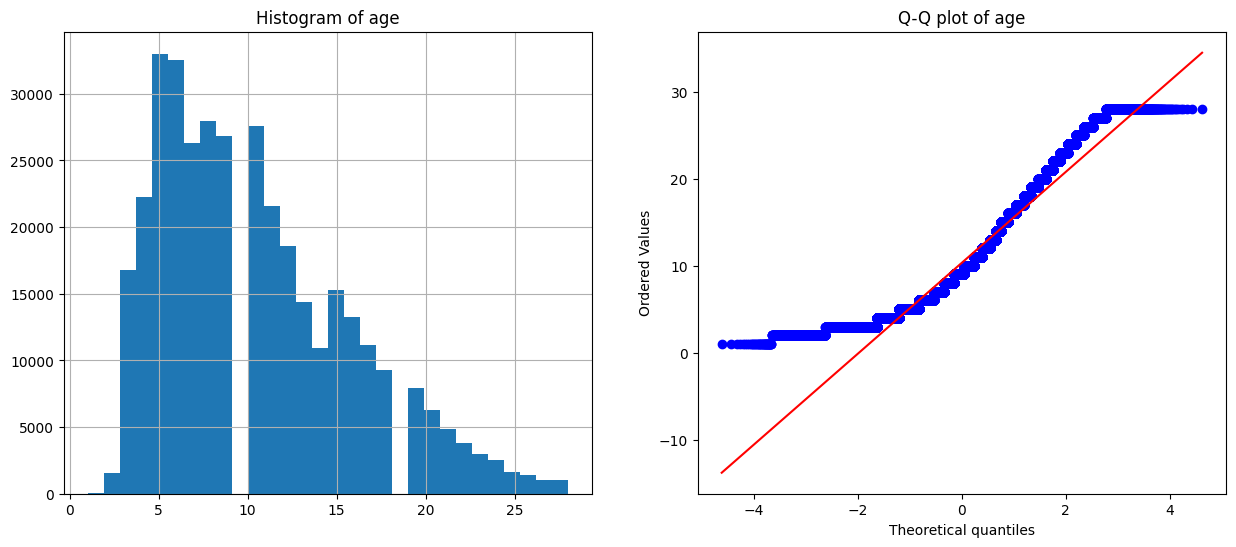

In [ ]:
diagnostic_plots(cars_df, 'age')

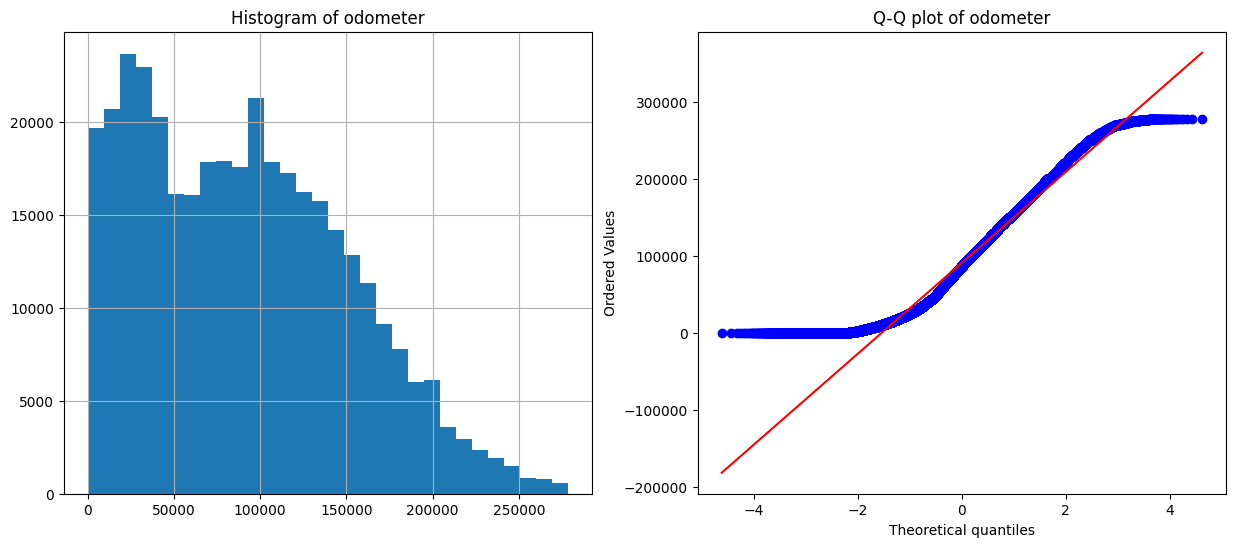

In [ ]:
diagnostic_plots(cars_df, 'odometer')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [ ]:
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
variables = ['price', 'age', 'odometer']
transformer.fit(cars_df[variables])

PowerTransformer(standardize=False)

In [ ]:
transformer.lambdas_

array([0.42847778, 0.08669611, 0.5301147 ])

In [ ]:
trans_df = transformer.transform(cars_df[variables])
trans_df = pd.DataFrame(trans_df, columns=variables)
trans_df

,price,age,odometer
0,200.648218,2.548500,629.785377
1,168.918413,2.965365,702.965871
2,215.457009,1.473041,349.514589
3,193.761084,2.119684,524.901169
4,141.362733,2.665350,959.812276
...,...,...,...
362772,172.126351,1.727132,461.031291
362773,192.672583,1.473041,272.674665
362774,204.230823,1.473041,154.786328
362775,188.235191,1.938419,444.677381


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

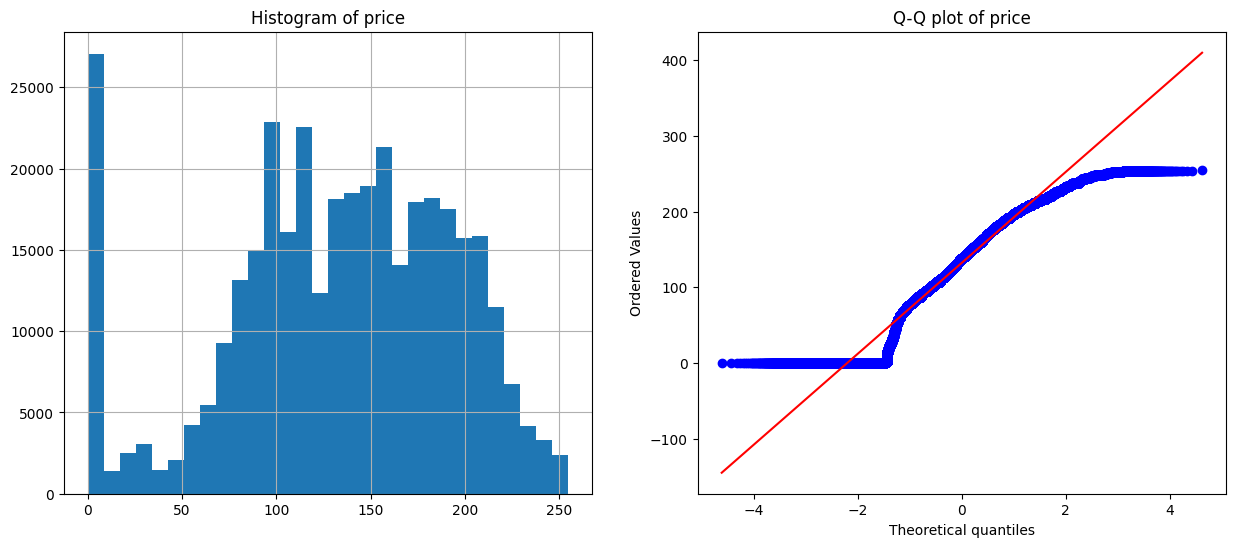

In [ ]:
diagnostic_plots(trans_df, 'price')

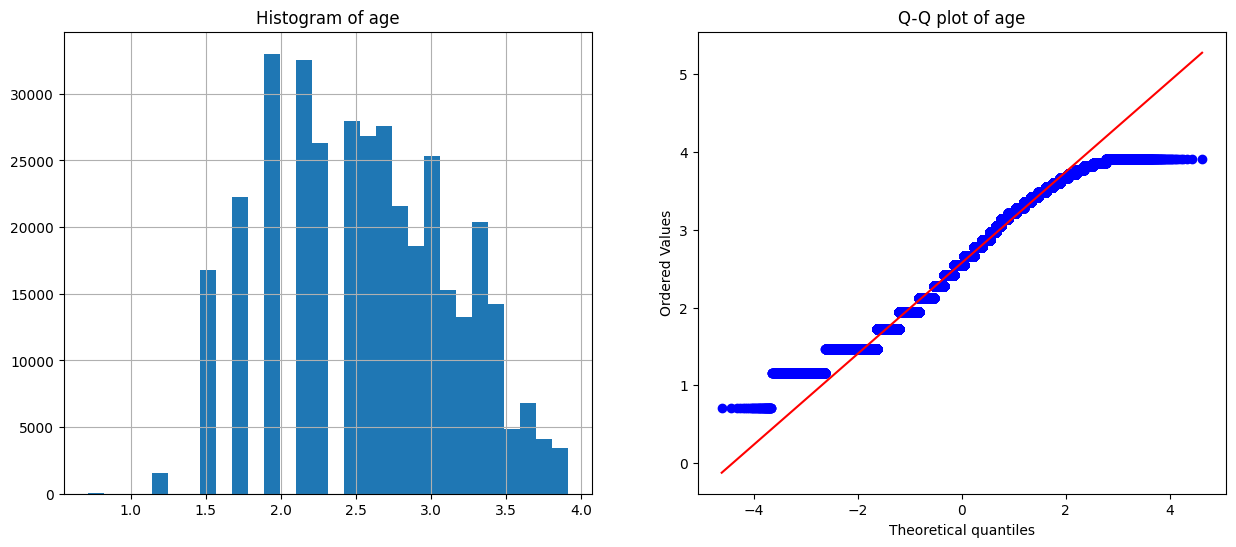

In [ ]:
diagnostic_plots(trans_df, 'age')

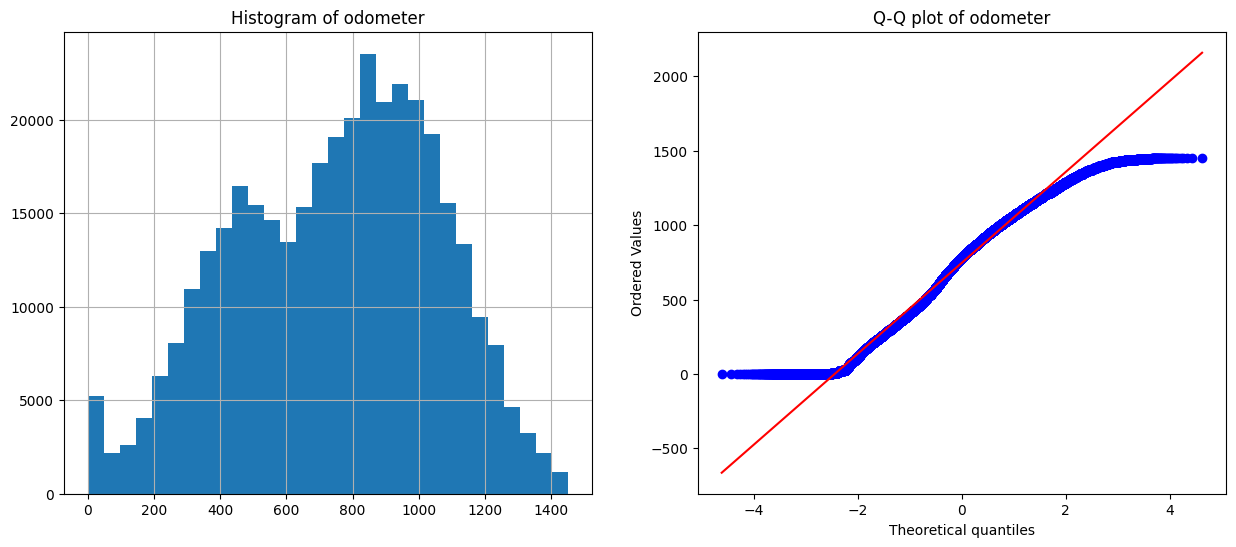

In [ ]:
diagnostic_plots(trans_df, 'odometer')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [ ]:
from sklearn import preprocessing


minmax_scale = preprocessing.MinMaxScaler().fit(trans_df)
df_minmax = minmax_scale.transform(trans_df)

df_minmax = pd.DataFrame(df_minmax, columns=variables)
df_minmax


,price,age,odometer
0,0.788279,0.573885,0.434239
1,0.663623,0.704320,0.484697
2,0.846457,0.237377,0.240991
3,0.761222,0.439710,0.361921
4,0.555366,0.610447,0.661793
...,...,...,...
362772,0.676226,0.316881,0.317882
362773,0.756945,0.237377,0.188010
362774,0.802354,0.237377,0.106726
362775,0.739512,0.382992,0.306606


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

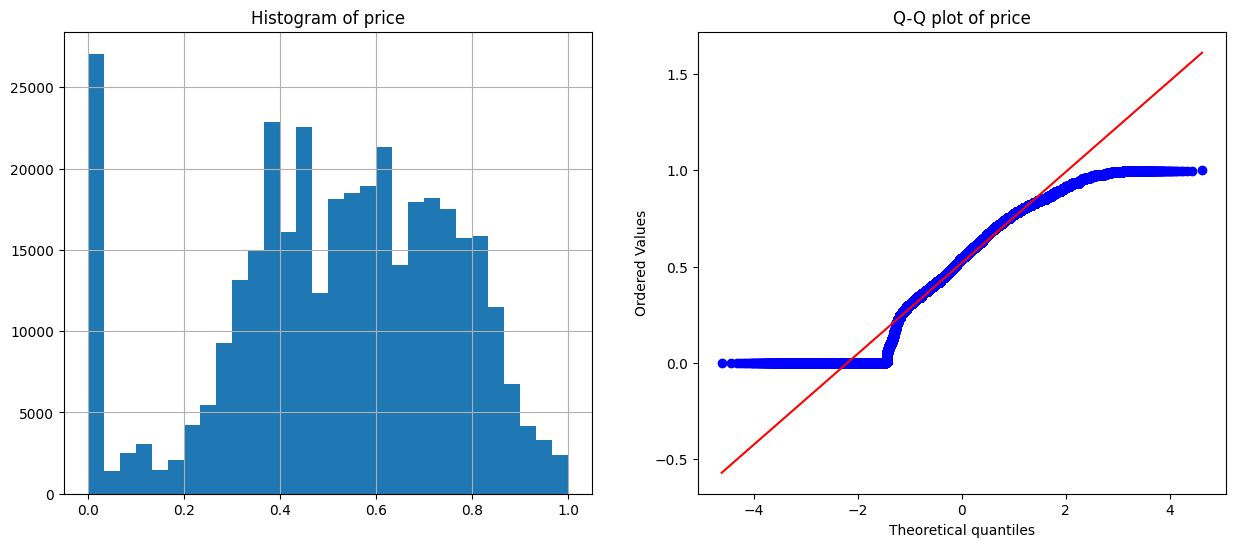

In [ ]:
diagnostic_plots(df_minmax, 'price')

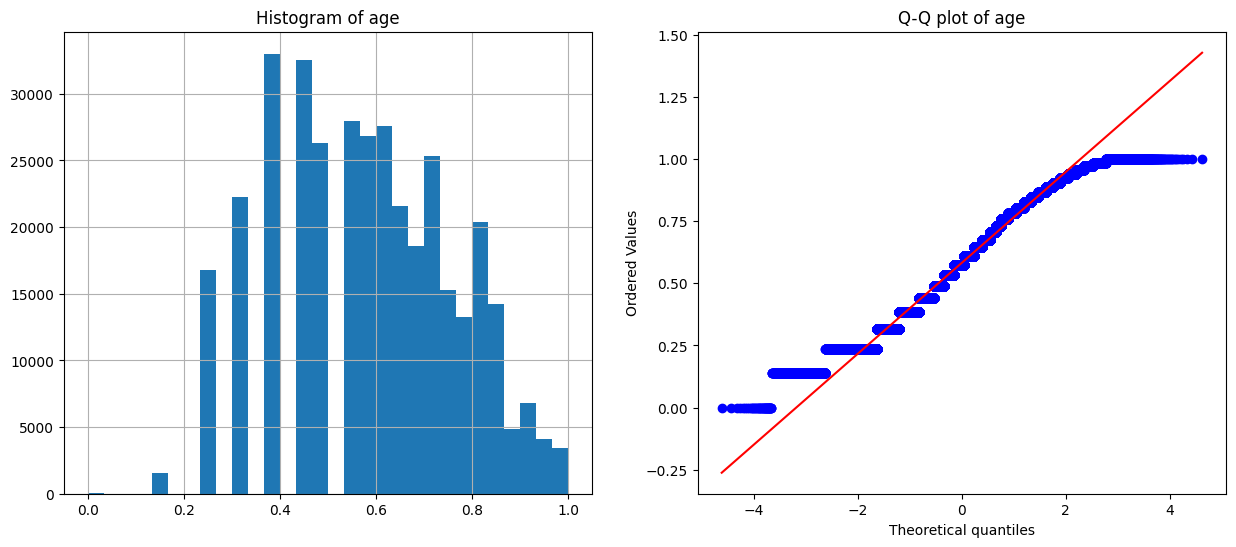

In [ ]:
diagnostic_plots(df_minmax, 'age')

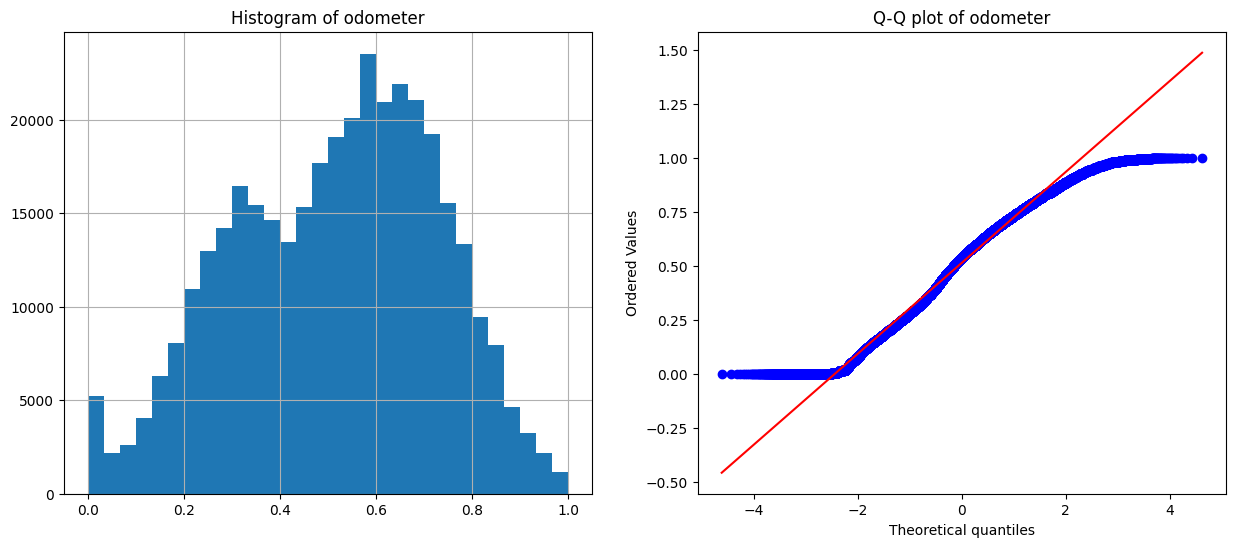

In [ ]:
diagnostic_plots(df_minmax, 'odometer')

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [ ]:
cars_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,362777,362777,362777,362777,362777,362777,362777,362777,362777
unique,404,413,40,19265,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3015,2743,61190,7198,309295,351115,288255,153769,42325


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [ ]:
highly_cardinal_variables = ['region','region_url','manufacturer','model','state']

few_cardinal_variables = ['fuel', 'title_status','transmission','type']

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

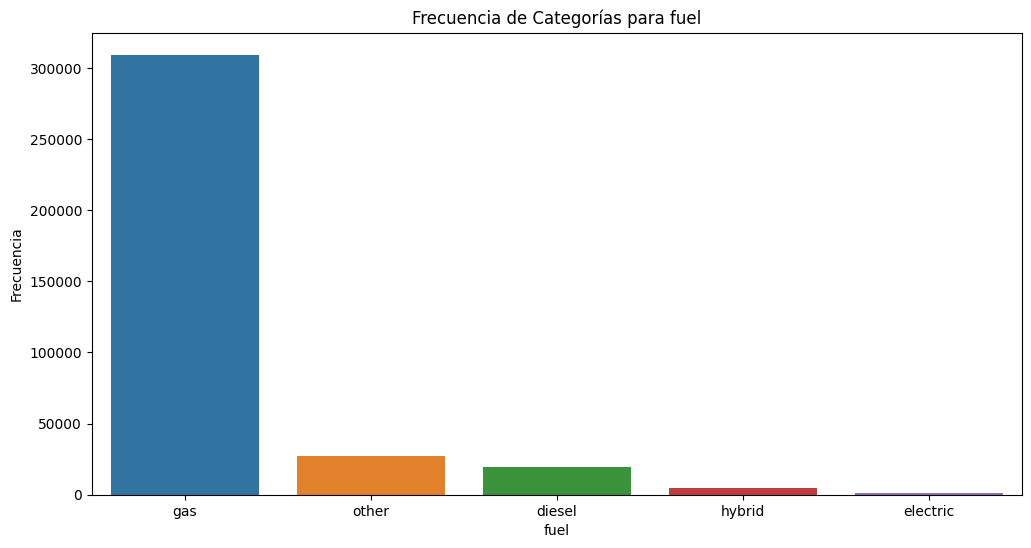

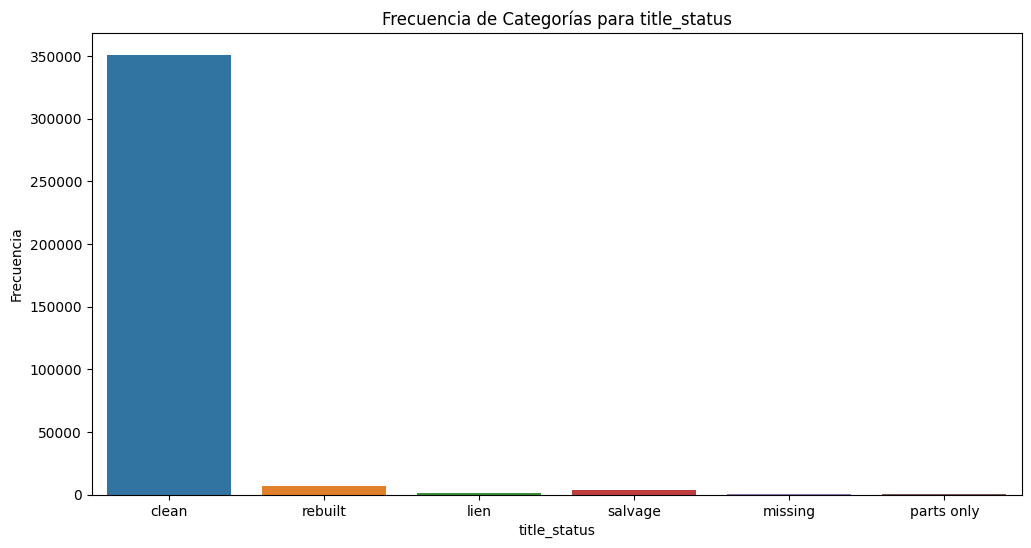

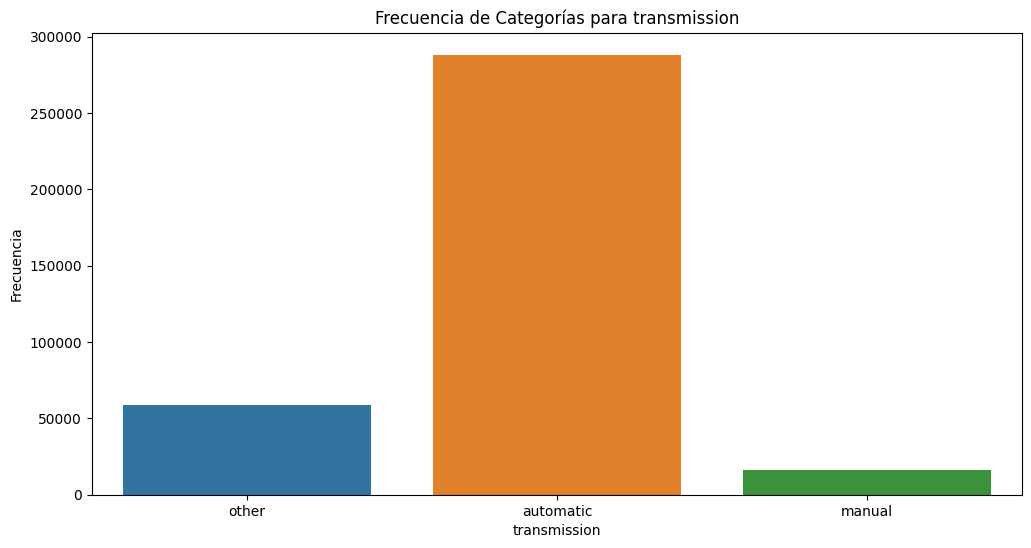

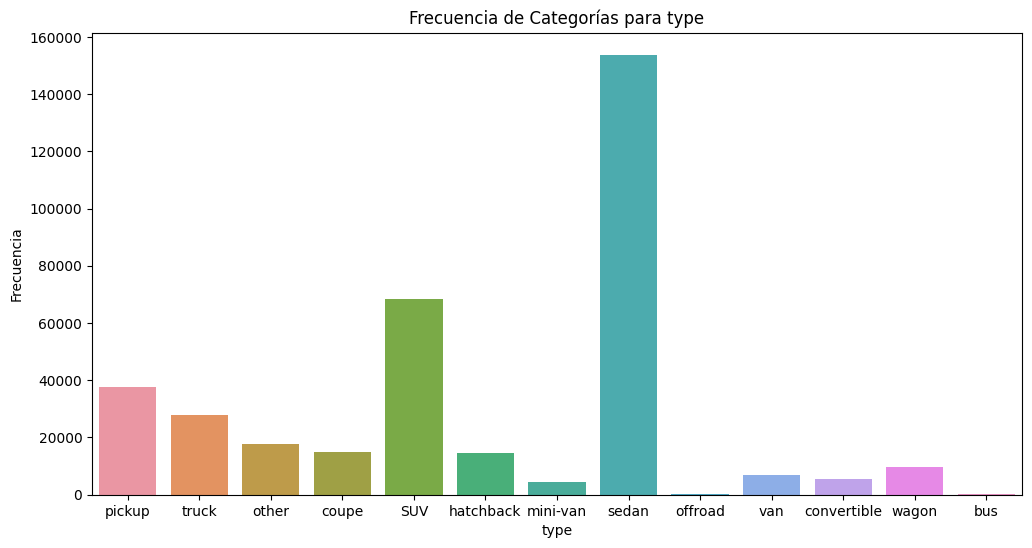

In [ ]:
for variable in few_cardinal_variables:
    plt.figure(figsize=(12, 6))  # Tamaño del gráfico
    sns.countplot(data=cars_df, x=variable)

    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.title(f"Frecuencia de Categorías para {variable}")

    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(drop='first',sparse_output=False)
# transform data
onehot_df = encoder.fit_transform(cars_df[few_cardinal_variables])
onehot_df = pd.DataFrame(onehot_df, columns=encoder.get_feature_names_out())

onehot_df

,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
362773,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
362774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.binary import BinaryEncoder
# # define one hot encoding
encoder = BinaryEncoder()
# transform data
binary_df = encoder.fit_transform(cars_df[highly_cardinal_variables])
binary_df = pd.DataFrame(binary_df, columns=encoder.get_feature_names_out())

binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_11,model_12,model_13,model_14,state_0,state_1,state_2,state_3,state_4,state_5
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
29,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
30,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
31,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,0,1,1,1,1,1,0,0,1,1
426876,1,1,0,0,1,0,1,0,0,1,...,0,1,1,1,1,1,0,0,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,1,0,1,1,1,1,0,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,1,0,0,1,1


10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [ ]:
dataframes_to_concat = [df_minmax, onehot_df, binary_df]

for df in dataframes_to_concat:
    df.reset_index(drop=True, inplace=True)


minmax_df = pd.concat(dataframes_to_concat, axis=1)
minmax_df

,price,age,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,...,model_11,model_12,model_13,model_14,state_0,state_1,state_2,state_3,state_4,state_5
0,0.788279,0.573885,0.434239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,0.663623,0.704320,0.484697,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.846457,0.237377,0.240991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1
3,0.761222,0.439710,0.361921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0.555366,0.610447,0.661793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.676226,0.316881,0.317882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,0,0,1,1
362773,0.756945,0.237377,0.188010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,0,0,1,1
362774,0.802354,0.237377,0.106726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,1,1,1,0,0,1,1
362775,0.739512,0.382992,0.306606,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,1,0,0,1,1
